#ID0309 - Aprendizaje Estadístico

### Otoño 2023

### ID0309_Lab_3.2

**Enrique Naredo García**

<font size = 2>
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Se recuerda no compartir esta información fuera de los integrantes registrados en este curso. La reproducción total o parcial de este documento requiere autorización por escrito del titular del copyright.*
</font>

#K-medias

K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de $n$ observaciones en $k$ grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano.

* Es un método utilizado en minería de datos.
* La agrupación del conjunto de datos puede ilustrarse en una partición del espacio de datos en celdas de Voronoi.
* El problema es computacionalmente difícil (NP-hard).
* Sin embargo, hay eficientes heurísticas que se emplean comúnmente y convergen rápidamente a un óptimo local.
* Estos suelen ser similares a los algoritmos expectation-maximization de mezclas de distribuciones gausianas por medio de un enfoque de refinamiento iterativo empleado por ambos algoritmos.
* Además, los dos algoritmos usan los centros que los grupos utilizan para modelar los datos, sin embargo k-medias tiende a encontrar grupos de extensión espacial comparable, mientras que el mecanismo expectation-maximization permite que los grupos tengan formas diferentes.

Dado un conjunto de observaciones $(x_1, x_2, …, x_n)$, donde cada observación es un vector real de d dimensiones
* $k$-medias construye una partición de las observaciones en $k$ conjuntos $(k ≤ n)$ a fin de minimizar la suma de los cuadrados dentro de cada grupo (WCSS): $S = {S_1, S_2, …, S_k}$

$$ \underset{S}{\text{argmin}} \sum_{i=1}^k \sum_{x_j \in S_i} || x_j - \mu_i ||^2 $$

donde $\mu_i$ es la media de puntos en $S_i$.

In [1]:
# librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
#  Crea un conjunto de datos sintéticos
X, y = make_blobs(n_samples = 1000, n_features = 2,
                  centers = 4, random_state = 23)

In [3]:
print(X)

[[ 4.94837435 -2.62641531]
 [-4.9548111   3.8959314 ]
 [ 1.07483352 10.90768681]
 ...
 [ 4.21281249 -5.88959571]
 [ 0.24256669 10.32418709]
 [-5.68213827 -0.95009827]]


In [4]:
print(X[:,0])

[ 4.94837435e+00 -4.95481110e+00  1.07483352e+00 -7.17549594e+00
 -5.66179995e+00 -4.37266585e+00 -5.57895651e+00 -4.73852090e+00
 -8.01802907e+00 -1.21129582e+00 -4.49405542e-01  1.54053891e+00
 -5.59933672e+00  5.52338467e+00  5.48353407e+00 -7.64599578e+00
 -4.84786377e+00 -6.65446841e+00  6.86139010e+00  5.33237470e+00
 -1.36601802e-01 -6.08586447e+00 -8.15165155e+00 -6.61653523e+00
 -4.65624261e-01 -9.29975524e-02 -6.24344192e+00  5.32884833e+00
 -4.03590339e-01 -5.14656204e-01  1.07602794e+00 -4.52120261e+00
  5.87800806e+00  4.86073415e+00 -4.93089106e+00 -7.38669929e+00
 -7.90202400e+00 -5.61521837e+00 -5.74859386e+00 -6.68373457e+00
  3.69660337e-01  5.02365502e+00  5.58249840e+00 -5.15738291e+00
 -5.95772393e+00 -7.51755956e+00  7.66580337e-01  4.61117516e+00
 -6.17493161e+00 -6.54032143e+00 -7.46057441e+00 -6.54289442e+00
 -6.10893478e+00 -7.54531521e+00  9.99573665e-01 -6.74824247e+00
  1.23234197e+00 -8.92484479e-01 -6.54685197e+00  5.80877856e+00
 -3.64858413e+00  5.96694

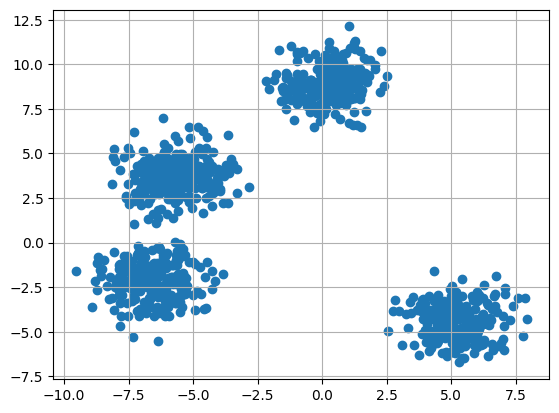

In [5]:
# muestra la gráfica
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
# selecciona número de agrupamientos
k = 3

In [7]:
# inicializa centroides aleatoriamente
clusters = {}
np.random.seed(23)

# ciclo para inicializar centroides
for idx in range(k):
	center = 2*(2*np.random.random((X.shape[1],))-1)
	points = []
	# diccionario para guardar agrupamientos
	cluster = {'center': center, 'points': []}
	# asigna cluster
	clusters[idx] = cluster

In [8]:
# imprime los centroides
for key, value in clusters.items():
    print(key, ' : ', value)

0  :  {'center': array([0.06919154, 1.78785042]), 'points': []}
1  :  {'center': array([ 1.06183904, -0.87041662]), 'points': []}
2  :  {'center': array([-1.11581855,  0.74488834]), 'points': []}


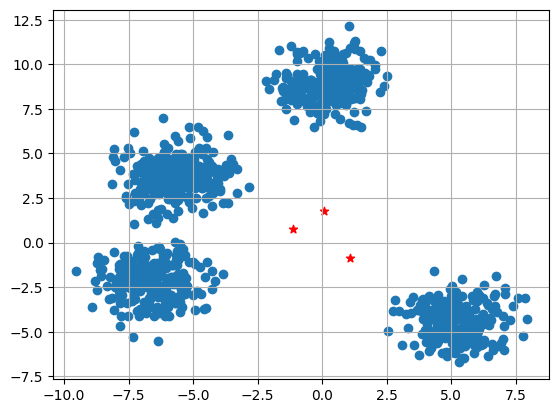

In [9]:
# Grafíca los puntos y centroides iniciales
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [10]:
# distance Euclidiana
def distance(p1,p2):
	return np.sqrt(np.sum((p1-p2)**2))

In [11]:
# asigna puntos al centroide
def assign_clusters(X, clusters):
	for idx in range(X.shape[0]):
		dist = []
		curr_x = X[idx]
		for i in range(k):
			dis = distance(curr_x,clusters[i]['center'])
			dist.append(dis)
		curr_cluster = np.argmin(dist)
		clusters[curr_cluster]['points'].append(curr_x)
	return clusters

In [12]:
# actualiza el centroide
def update_clusters(X, clusters):
	for i in range(k):
		points = np.array(clusters[i]['points'])
		if points.shape[0] > 0:
			new_center = points.mean(axis =0)
			clusters[i]['center'] = new_center
			clusters[i]['points'] = []
	return clusters

In [13]:
# predice el centroide para los puntos
def pred_cluster(X, clusters):
	pred = []
	for i in range(X.shape[0]):
		dist = []
		for j in range(k):
			dist.append(distance(X[i],clusters[j]['center']))
		pred.append(np.argmin(dist))
	return pred

In [14]:
# prueba el algoritmos
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

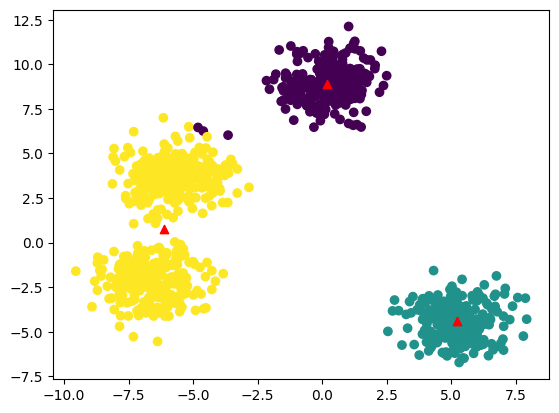

In [15]:
# grafíca el resultado
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()